In [ ]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [ ]:
mnist = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train,y_train) , (X_test,y_test) = mnist

In [ ]:
X_train.shape
#60 thousand images are in the training data, and each image of 28x28

(60000, 28, 28)

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
# Target variable classes
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

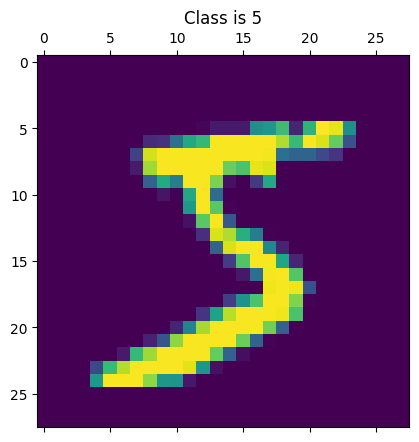

In [ ]:
# Visualize the dataset
import matplotlib.pyplot as plt
plt.matshow(X_train[0])
plt.title(f"Class is {y_train[0]}")
plt.show()

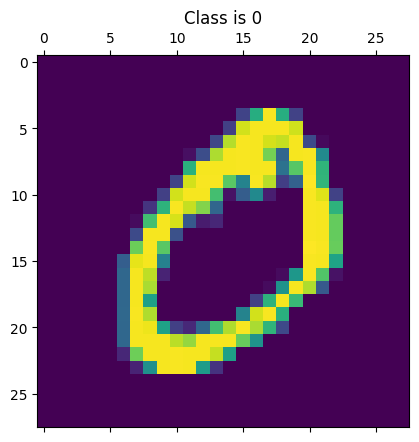

In [ ]:
# Visualize the dataset
import matplotlib.pyplot as plt
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [ ]:
# Preprocessing
# Pixel intensity would be from 0 to 255
import numpy as np
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

In [ ]:
# Normalize the pixel values
X_train = X_train/255
X_test = X_test/255

In [ ]:
np.min(X_train), np.max(X_train)

(np.float64(0.0), np.float64(1.0))

In [ ]:
np.min(X_test), np.max(X_test)

(np.float64(0.0), np.float64(1.0))

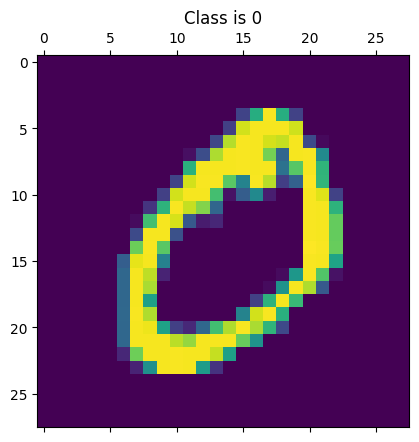

In [ ]:
plt.matshow(X_train[1])
plt.title(f"Class is {y_train[1]}")
plt.show()

In [ ]:
# flatten() --> Convert the multi-dimensional features into 1 dimension

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
# Target values

y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Performing One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Model
model = Sequential()
model.add(Dense(256, activation ='relu', input_shape = [784, ], name = 'h1'))
model.add(Dense(128, activation = 'relu', name='h2'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers[0].get_weights()

[array([[-0.06633563,  0.05130611, -0.01970497, ...,  0.06353787,
          0.01304177,  0.05263036],
        [-0.02083587, -0.02290512, -0.06552821, ...,  0.00477724,
         -0.01438757,  0.07000974],
        [-0.07436632, -0.05377823, -0.01490638, ...,  0.000292  ,
          0.00781535,  0.02743272],
        ...,
        [-0.00234512,  0.04885191, -0.00653224, ...,  0.05375905,
         -0.03521178, -0.031621  ],
        [-0.02828257, -0.04170208, -0.00855657, ..., -0.01997147,
          0.05524646, -0.05238351],
        [ 0.02037045, -0.02796673,  0.03615779, ..., -0.05570961,
         -0.07492451,  0.02342543]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(x= X_train, y= y_train, epochs = 25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8946 - loss: 0.3441 - val_accuracy: 0.9638 - val_loss: 0.1192
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9706 - loss: 0.0949 - val_accuracy: 0.9687 - val_loss: 0.1034
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9811 - loss: 0.0638 - val_accuracy: 0.9747 - val_loss: 0.0875
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9876 - loss: 0.0460 - val_accuracy: 0.9780 - val_loss: 0.0888
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9775 - val_loss: 0.0941
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9912 - loss: 0.0292 - val_accuracy: 0.9748 - val_loss: 0.1135
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9933 - loss: 0.0252 - val_accuracy: 0.9773 - val_loss: 0.1027
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9933 - loss: 0

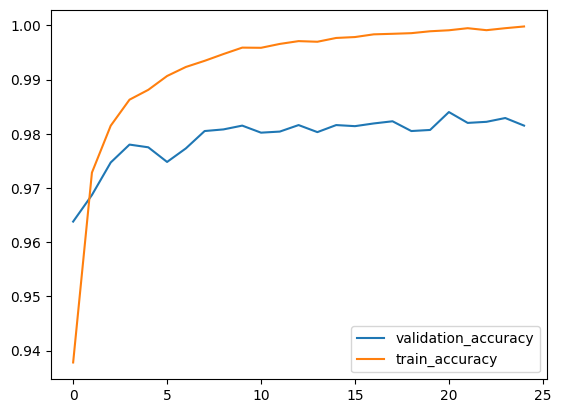

In [ ]:
# Visualizing the accuracy
h = history.history
plt.plot(h['val_accuracy'], label = "validation_accuracy")
plt.plot(h['accuracy'], label = 'train_accuracy')
plt.legend()
plt.show()

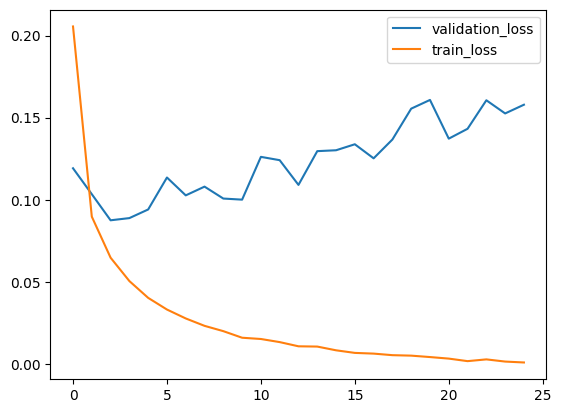

In [ ]:
# Visualising the loss

plt.plot(h['val_loss'], label = "validation_loss")
plt.plot(h['loss'], label = "train_loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9773 - loss: 0.2030


[0.15788455307483673, 0.9815000295639038]